In [21]:
import pandas as pd
dt = pd.read_csv("youtube.csv")
print(dt.head())

              CommentId      VideoId  \
0  Ugg2KwwX0V8-aXgCoAEC  04kJtp6pVXI   
1  Ugg2s5AzSPioEXgCoAEC  04kJtp6pVXI   
2  Ugg3dWTOxryFfHgCoAEC  04kJtp6pVXI   
3  Ugg7Gd006w1MPngCoAEC  04kJtp6pVXI   
4  Ugg8FfTbbNF8IngCoAEC  04kJtp6pVXI   

                                                Text  IsToxic  IsAbusive  \
0  If only people would just take a step back and...    False      False   
1  Law enforcement is not trained to shoot to app...     True       True   
2  \r\nDont you reckon them 'black lives matter' ...     True       True   
3  There are a very large number of people who do...    False      False   
4  The Arab dude is absolutely right, he should h...    False      False   

   IsThreat  IsProvocative  IsObscene  IsHatespeech  IsRacist  IsNationalist  \
0     False          False      False         False     False          False   
1     False          False      False         False     False          False   
2     False          False       True         False     False 

In [23]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CommentId        1000 non-null   object
 1   VideoId          1000 non-null   object
 2   Text             1000 non-null   object
 3   IsToxic          1000 non-null   bool  
 4   IsAbusive        1000 non-null   bool  
 5   IsThreat         1000 non-null   bool  
 6   IsProvocative    1000 non-null   bool  
 7   IsObscene        1000 non-null   bool  
 8   IsHatespeech     1000 non-null   bool  
 9   IsRacist         1000 non-null   bool  
 10  IsNationalist    1000 non-null   bool  
 11  IsSexist         1000 non-null   bool  
 12  IsHomophobic     1000 non-null   bool  
 13  IsReligiousHate  1000 non-null   bool  
 14  IsRadicalism     1000 non-null   bool  
dtypes: bool(12), object(3)
memory usage: 35.3+ KB


In [25]:
dt.isnull().sum()

CommentId          0
VideoId            0
Text               0
IsToxic            0
IsAbusive          0
IsThreat           0
IsProvocative      0
IsObscene          0
IsHatespeech       0
IsRacist           0
IsNationalist      0
IsSexist           0
IsHomophobic       0
IsReligiousHate    0
IsRadicalism       0
dtype: int64

In [51]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


C:\Users\madhu\AppData\Local\Temp\ipykernel_18828\2444597972.py:32: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


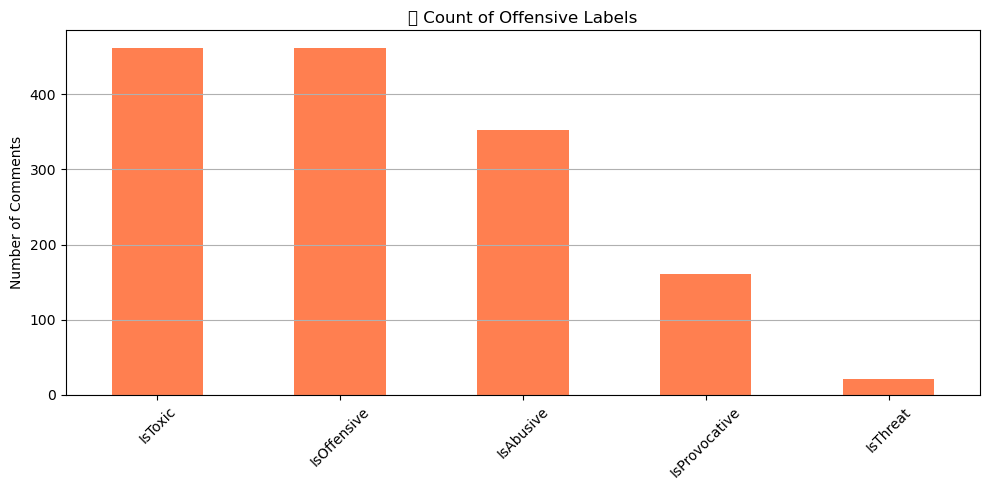

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129514 (\N{TEST TUBE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


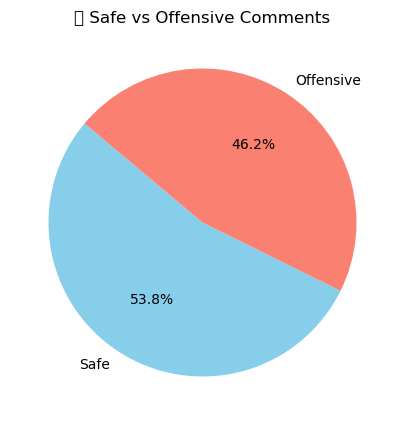

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128221 (\N{MEMO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


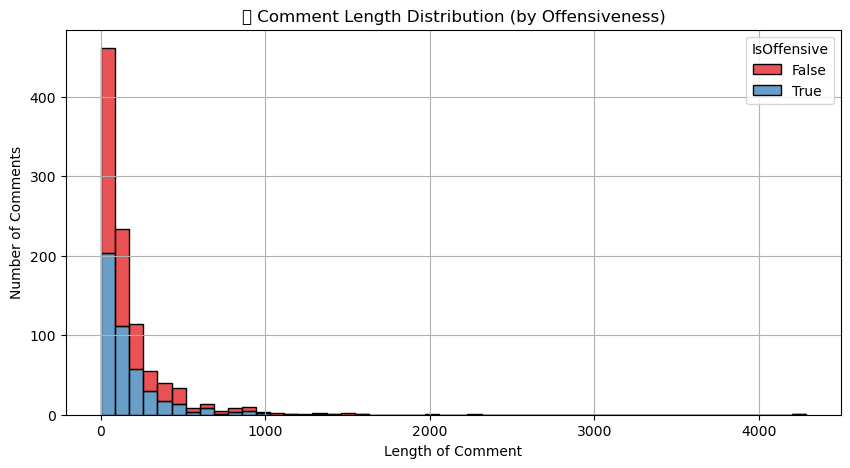

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re

dt = pd.read_csv("youtube.csv")

cols = ['IsToxic', 'IsAbusive', 'IsThreat', 'IsProvocative']
for col in cols:
    dt[col] = dt[col].map(lambda x: True if str(x).upper() == 'TRUE' else False)


dt['IsOffensive'] = dt[cols].any(axis=1)

def clean_text(text):
    text = re.sub(r"http\S+", "", str(text))
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    text = text.lower()
    return text

dt['Text'] = dt['Text'].astype(str).apply(clean_text)

plt.figure(figsize=(10, 5))
dt[['IsToxic', 'IsAbusive', 'IsThreat', 'IsProvocative', 'IsOffensive']].sum().sort_values(ascending=False).plot(
    kind='bar', color='coral'
)
plt.title("🔥 Count of Offensive Labels")
plt.ylabel("Number of Comments")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


offensive_counts = dt['IsOffensive'].value_counts(normalize=True) * 100
labels = ['Offensive' if val else 'Safe' for val in offensive_counts.index]
colors = ['salmon' if val else 'skyblue' for val in offensive_counts.index]

plt.figure(figsize=(5, 5))
offensive_counts.plot.pie(
    autopct='%1.1f%%',
    labels=labels,
    colors=colors,
    startangle=140
)
plt.title("🧪 Safe vs Offensive Comments")
plt.ylabel("")
plt.show()

dt['TextLength'] = dt['Text'].apply(len)

plt.figure(figsize=(10, 5))
sns.histplot(data=dt, x='TextLength', bins=50, hue='IsOffensive', multiple='stack', palette='Set1')
plt.title("📝 Comment Length Distribution (by Offensiveness)")
plt.xlabel("Length of Comment")
plt.ylabel("Number of Comments")
plt.grid(True)
plt.show()






C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128162 (\N{ANGER SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


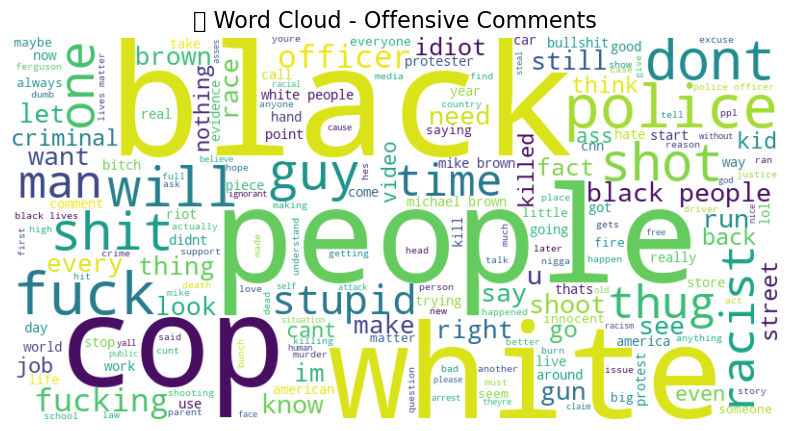

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


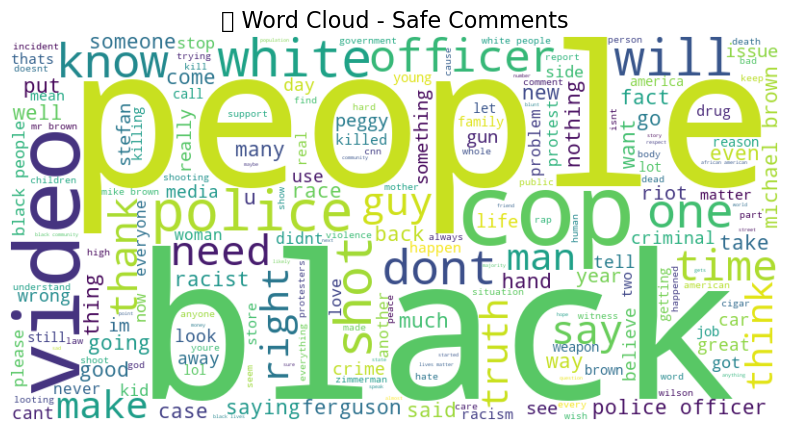

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


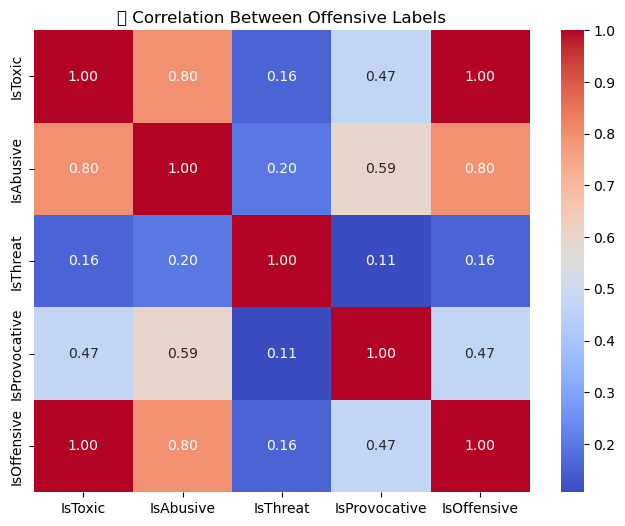

In [41]:
def generate_wordcloud(text_series, title):
    text = " ".join(text_series)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title, fontsize=16)
    plt.show()


generate_wordcloud(dt[dt['IsOffensive']]['Text'], "💢 Word Cloud - Offensive Comments")


generate_wordcloud(dt[~dt['IsOffensive']]['Text'], "✅ Word Cloud - Safe Comments")

plt.figure(figsize=(8, 6))
sns.heatmap(dt[cols + ['IsOffensive']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("📈 Correlation Between Offensive Labels")
plt.show()

In [39]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.utils import resample


dt = pd.read_csv("youtube.csv")


cols = ['IsToxic', 'IsAbusive', 'IsThreat', 'IsProvocative']
for col in cols:
    dt[col] = dt[col].map(lambda x: True if str(x).upper() == 'TRUE' else False)

dt['IsOffensive'] = dt[cols].any(axis=1)

def clean_text(text):
    text = re.sub(r"http\S+", "", text)  
    text = re.sub(r"[^a-zA-Z\s]", "", text)  
    text = text.lower()  
    return text


dt['Text'] = dt['Text'].astype(str).apply(clean_text)
df_safe = dt[dt['IsOffensive'] == False]
df_offensive = dt[dt['IsOffensive'] == True]

df_offensive_upsampled = resample(
    df_offensive,
    replace=True,
    n_samples=len(df_safe),
    random_state=42
)


dt_balanced = pd.concat([df_safe, df_offensive_upsampled])


X_train, X_test, y_train, y_test = train_test_split(
    dt_balanced['Text'], dt_balanced['IsOffensive'], test_size=0.2, random_state=42
)


vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


clf = LogisticRegression(class_weight='balanced', max_iter=1000)
clf.fit(X_train_vec, y_train)


y_pred = clf.predict(X_test_vec)
print("\n🔍 Classification Report:\n")
print(classification_report(y_test, y_pred))
print(f"✅ Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"📊 Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")


def predict_offensive(comment):
    clean_comment = clean_text(comment)
    vec = vectorizer.transform([clean_comment])
    result = clf.predict(vec)[0]
    return "Offensive" if result else "Safe"

print("\n🧪 Test Predictions:")
examples = [
    "You're a loser",
    "Great work on the video!",
    "Shut your mouth",
    "WTF is this",
    "I love this content",
    "Go kill yourself",
    "Thanks for the tutorial!",
]

for comment in examples:
    print(f"Comment: '{comment}' → {predict_offensive(comment)}")



🔍 Classification Report:

              precision    recall  f1-score   support

       False       0.76      0.86      0.81       108
        True       0.84      0.73      0.78       108

    accuracy                           0.80       216
   macro avg       0.80      0.80      0.80       216
weighted avg       0.80      0.80      0.80       216

✅ Accuracy: 0.80
📊 Confusion Matrix:
[[93 15]
 [29 79]]

🧪 Test Predictions:
Comment: 'You're a loser' → Offensive
Comment: 'Great work on the video!' → Safe
Comment: 'Shut your mouth' → Safe
Comment: 'WTF is this' → Safe
Comment: 'I love this content' → Safe
Comment: 'Go kill yourself' → Offensive
Comment: 'Thanks for the tutorial!' → Safe


In [43]:
import pickle
pickle.dump(clf,open('clf.pkl','wb'))
pickle.dump(vectorizer,open('vectorizer.pkl','wb'))

In [45]:
try:
    with open('clf.pkl', 'rb') as f:
        clf = pickle.load(f)
        print("✅ Model loaded")
except Exception as e:
    print("❌ Error loading model:", e)


✅ Model loaded
